In [1]:
import gc
import torch 
import os

torch.cuda.empty_cache()
cwd = os.getcwd()
sep = os.sep

In [2]:
path = cwd + sep + "ecg_data" + sep + 'mitbih'
filenames = []
for file in os.listdir(path):
    if file.split(".")[-1] == "dat":
        filenames.append(file.split(".")[0])

In [25]:
import wfdb 

skipsignals = [102, 104, 107, 217]
signals = []
labels = []
annotations = []
for i, filename in enumerate(filenames):
    print(i+1, "/", len(filenames), end = "\r")
    record = wfdb.rdsamp(path + sep + filename)
    annotation = wfdb.rdann(path + sep + filename, 'atr')
    signals.append(record)
    annotations.append(annotation)
    labels.append(annotation.symbol)
signals

[(array([[-0.145, -0.065],
         [-0.145, -0.065],
         [-0.145, -0.065],
         ...,
         [-0.675, -0.365],
         [-0.765, -0.335],
         [-1.28 ,  0.   ]]),
  {'fs': 360,
   'sig_len': 650000,
   'n_sig': 2,
   'base_date': None,
   'base_time': None,
   'units': ['mV', 'mV'],
   'sig_name': ['MLII', 'V5'],
   'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}),
 (array([[-0.345, -0.16 ],
         [-0.345, -0.16 ],
         [-0.345, -0.16 ],
         ...,
         [-0.295, -0.11 ],
         [-0.29 , -0.11 ],
         [ 0.   ,  0.   ]]),
  {'fs': 360,
   'sig_len': 650000,
   'n_sig': 2,
   'base_date': None,
   'base_time': None,
   'units': ['mV', 'mV'],
   'sig_name': ['MLII', 'V1'],
   'comments': ['75 F 1011 654 x1', 'Diapres']}),
 (array([[-0.2  ,  0.005],
         [-0.2  ,  0.005],
         [-0.2  ,  0.005],
         ...,
         [-0.17 ,  0.2  ],
         [-0.195,  0.195],
         [ 0.   ,  0.   ]]),
  {'fs': 360,
   'sig_len': 650000,
   'n_sig': 2,
 

In [26]:
labels[0]

['+',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'A',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [29]:
device = "cuda:0" if torch.cuda.is_available else "cpu"
device

'cuda:0'

In [30]:
def get_signal(signal):

    signal_names = signal[1]["sig_name"]
    signal_channels = {"MLI": 0,
                       "MLII": 1,
                       "MLIII": 2,
                       "aVR": 3,
                       "aVL": 4,
                       "aVF": 5,
                       "V1": 6,
                       "V2": 7,
                       "V3": 8,
                       "V4": 9,
                       "V5": 10,
                       "V6": 11,
                      }

    n = len(signal[0])
    nchs = 15

    if "MLII" in signal_names:
        idx = np.argwhere(np.array(signal_names) == "MLII")[0][0]
        print("MLII ", idx, signal[0][:, idx].shape)
        signal_final = torch.zeros((nchs, n))
        signal_final[1] = torch.from_numpy(signal[0][:, idx]).float()
        channels = [signal_channels[signalname] for signalname in signal_names]
    else:
        signal_final = None
    return signal_final

In [31]:
import numpy as np 
signals_final = []
for signal in signals:
    signal_final = get_signal(signal)
    if signal_final is not None:
        signals_final.append(signal_final)
signals_final = torch.stack(signals_final)
signals_final.shape

MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  1 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)
MLII  0 (650000,)


torch.Size([46, 15, 650000])

In [32]:
good = True 
for idx, signal_final in enumerate(signals_final):
    for ch in range(15):
        n = len(signal_final[ch, :])
        if (torch.zeros(n) != signal_final[ch, :]).any():
            if ch != 1:
                print(idx, ch)
                good = False
good                

True

In [33]:
from scipy.signal import butter, lfilter, iirnotch

def bandpass(lowcut, highcut, order=3, fs = 500):
    
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def notch_filter(cutoff, q, fs=500):
    
    nyq = 0.5*fs
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a

def myfilter(lowcut, highcut, powerline, data):
    
    nchs = 15
    filtered_data = np.zeros_like(data)
    for ch in range(nchs):
        ch_data = data[ch, :]
        if ch_data != np.zeros_like(ch_data):
            b, a = bandpass(lowcut, highcut)   
            x = lfilter(b, a, ch_data)
            f, e = notch_filter(powerline, 30)
            z = lfilter(f, e, x) 
            filtered_data[ch, :] = (x)
    return torch.from_numpy(filtered_data)

In [34]:
from scipy.signal import resample

def multichannel_resample(signal, new_lenght):
    nchs = 15
    resampled_signal = np.zeros((nchs, new_lenght))
    for ch in range(nchs):
        resampled_signal[ch, :] = resample(signal[ch, :], new_lenght)
    return resampled_signal

In [35]:
seconds = 4
fs = 360
fs_in = 500 
n = len(signals_final)

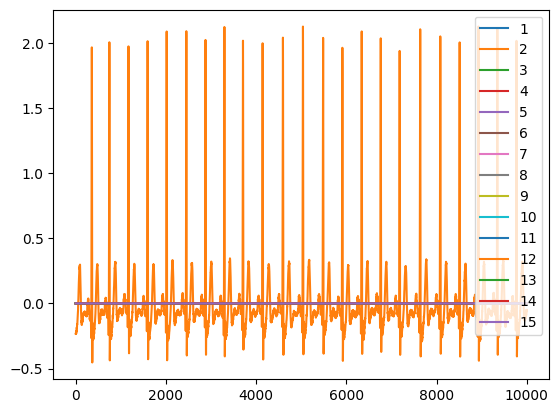

In [36]:
import matplotlib.pyplot as plt 
import numpy as np 
signal = signals_final[2]
n = signal.shape[-1]

nchs = 15
fs = 360
fs_in = 500
seconds = 4
seconds_signal = int(n/fs)
n_resampled = seconds_signal*fs_in
#print(n_resampled)
resampled_signal = multichannel_resample(signal, n_resampled)
resampled_signal = torch.from_numpy(resampled_signal)
filtered_signal = myfilter(0.5, 100, 60, resampled_signal)
for ch in range(nchs):
    plt.plot(filtered_signal[ch, 40000:50000], label = ch+1) 
plt.legend()

In [37]:
annotations_signal = annotations[i]
len(annotations_signal.symbol), len(annotations_signal.sample)

(2764, 2764)

In [38]:
def contains_only_N(lst):
    normals = ["N", "L", "R"]
    return all(item in normals for item in lst if item != "+")

In [39]:
def get_windows_labels(labels, peaks, interval):

    start, end = interval 
    windows_labels = []
    for i, peak in enumerate(peaks):
        label = labels[i]
        if peak in np.arange(start, end, 1):
            windows_labels.append(label)
        elif peak > end:
            break
    #print(windows_labels)
    return windows_labels
        

In [40]:
from sklearn.preprocessing import MinMaxScaler

def resample_peaks(peaks, len_resampled, len_original):
    
    peaks = np.insert(peaks, 0, 0.0)
    peaks = np.insert(peaks, -1, len_original)
    scaler = MinMaxScaler(feature_range=(0, len_resampled))
    peaks_resampled = scaler.fit_transform(peaks.reshape(-1, 1))
    peaks_resampled = [int(peak[0]) for peak in peaks_resampled]
    peaks_resampled.pop(0)
    peaks_resampled.pop(-1)
    return peaks_resampled

In [41]:
from EcgStuffs.src.windows.WindowingUtils import sliding_window

In [42]:
signal = signals_final[0]
n = signal.shape[-1]
seconds_signal = int(n/fs)
n_resampled = seconds_signal*fs_in
resampled_signal = multichannel_resample(signal, n_resampled)
resampled_signal = torch.from_numpy(resampled_signal)
filtered_signal = myfilter(0.5, 100, 50, resampled_signal)
windows_signal = sliding_window(filtered_signal, fs_in*seconds, fs_in*(seconds-1)) 
annotations_signal = annotations[0]
labels = annotations_signal.symbol
peaks = annotations_signal.sample
peaks_resampled = resample_peaks(peaks, n_resampled, n)

In [43]:
peaks[:5], peaks_resampled[:5], n, n_resampled

(array([ 18,  77, 370, 662, 946], dtype=int64),
 [24, 106, 513, 919, 1313],
 650000,
 902500)

True


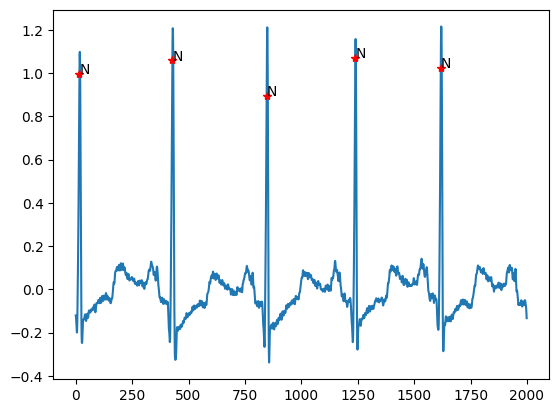

In [44]:
idx = 100
window = windows_signal[idx]
start = idx * fs_in * 3
end = start + fs_in * 4 
interval = [start, end]

labels_w = get_windows_labels(labels, peaks_resampled, interval)
is_normal = contains_only_N(labels_w)
label_window = 0 if is_normal else 1
print(is_normal)

peaks_value = []
peaks_windows = []
channel = 1
for peak in peaks_resampled:
    #print(peak, start, end)
    if peak in np.arange(start, end, 1):
        peaks_value.append(window[channel, peak-start])
        peaks_windows.append(peak-start)
    elif peak > end:
        break

fig, ax = plt.subplots()
plt.plot(window[channel, :]) 
plt.plot(peaks_windows, peaks_value, "r*")
for i in range(len(peaks_windows)):
    ax.annotate(labels_w[i], (peaks_windows[i], peaks_value[i]))

In [55]:
import numpy as np 

windows = []
windows_labels = []
windows_labels_sub = []

fs = 360
fs_in = 500
seconds = 4

for k, signal in enumerate(signals_final):
    
    print(k+1, "/", len(signals_final), end = "\r")

    n = signal.shape[-1]
    seconds_signal = int(n/fs)
    n_resampled = seconds_signal*fs_in
    resampled_signal = multichannel_resample(signal, n_resampled)
    resampled_signal = torch.from_numpy(resampled_signal)
    filtered_signal = myfilter(0.5, 100, 50, resampled_signal)
    #print(filtered_signal)
    windows_signal = sliding_window(filtered_signal, fs_in*seconds, fs_in*(seconds-1)) 
    annotations_signal = annotations[k]
    labels = annotations_signal.symbol
    peaks = annotations_signal.sample
    #peaks_resampled = resample_peaks(peaks, n_resampled)
    #print(windows_signal)
    start = 0
    end = fs_in*seconds
    print("\n")
    for j, window in enumerate(windows_signal):
        #print(j+1, "/", len(windows_signal), end = "\r")
        start += 3*fs_in
        end = start + seconds*fs_in
        interval = [start, end]
        labels_w = get_windows_labels(labels, peaks, interval)
        is_normal = contains_only_N(labels_w)
        windows_labels_sub.append(labels_w)
        label_window = 0 if is_normal else 1
        windows.append(window)
        windows_labels.append(label_window)
        del window
        del is_normal
        del labels_w

    torch.cuda.empty_cache()
    gc.collect()
    
windows = torch.stack(windows)

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601

601 / 601



In [56]:
windows.shape

torch.Size([27692, 15, 2000])

In [57]:
windows_labels = torch.tensor(windows_labels)
windows_labels.shape

torch.Size([27692])

In [58]:
idxs_normal = torch.argwhere(windows_labels == 0)
idxs_normal

tensor([[    1],
        [    2],
        [    3],
        ...,
        [27689],
        [27690],
        [27691]])

In [59]:
X_norm = windows[idxs_normal]
X_norm = torch.squeeze(X_norm, dim = 1)
y_norm = windows_labels[idxs_normal]
X_norm.shape, np.unique(y_norm)

(torch.Size([19947, 15, 2000]), array([0], dtype=int64))

In [60]:
y_norm_sub = []
for idx in idxs_normal:
 y_norm_sub.append(windows_labels_sub[idx])

In [61]:
y_norm_sub[0]

['N', 'N', 'N', 'N', 'N', 'N']

In [62]:
idxs_ab = torch.argwhere(windows_labels == 1)
X_ab = windows[idxs_ab] 
X_ab = torch.squeeze(X_ab, dim = 1)
y_ab = windows_labels[idxs_ab]
X_ab.shape, np.unique(y_ab)

(torch.Size([7745, 15, 2000]), array([1], dtype=int64))

In [63]:
y_ab_sub = []
for idx in idxs_ab:
 y_ab_sub.append(windows_labels_sub[idx])

In [66]:
from sklearn.model_selection import train_test_split

#X_train, X_test_norm, y_train, y_test_norm = train_test_split(X_norm, y_norm, train_size=0.8)
idxs_train, idxs_test, y_train, y_test_norm = train_test_split(idxs_normal, y_norm, train_size=0.8)
y_train.shape, y_test_norm.shape

(torch.Size([15957, 1]), torch.Size([3990, 1]))

In [67]:
idxs_train

tensor([[11724],
        [18554],
        [14718],
        ...,
        [ 5730],
        [13063],
        [18936]])

In [65]:
X_train = X_norm[idxs_train]
X_test_norm = X_norm[idxs_test]
y_train_sub = y_norm_sub[idxs_train]
y_test_norm_sub = y_norm_sub[idxs_test]
X_train.shape, X_test_norm.shape, y_train_sub.shape, y_test_norm_sub.shape

IndexError: index 24182 is out of bounds for dimension 0 with size 19947

In [ ]:
X_test_final = torch.concat([X_test_norm, X_ab])
y_test_final = torch.concat([y_test_norm, y_ab])
torch.save(X_test_final, "xtest_mitbih.pt")
torch.save(y_test_final, "ytest_mitbih.pt")

In [ ]:
torch.save(X_train, "xtrain_mitbih.pt")
torch.save(y_train, "ytrain_mitbih.pt")

In [ ]:
torch.save(y_test_, "ytest_mitbih.pt")
torch.save(y_train, "ytrain_mitbih.pt")

In [100]:
X_train.shape, X_test_final.shape

(torch.Size([15957, 15, 2000]), torch.Size([11735, 15, 2000]))

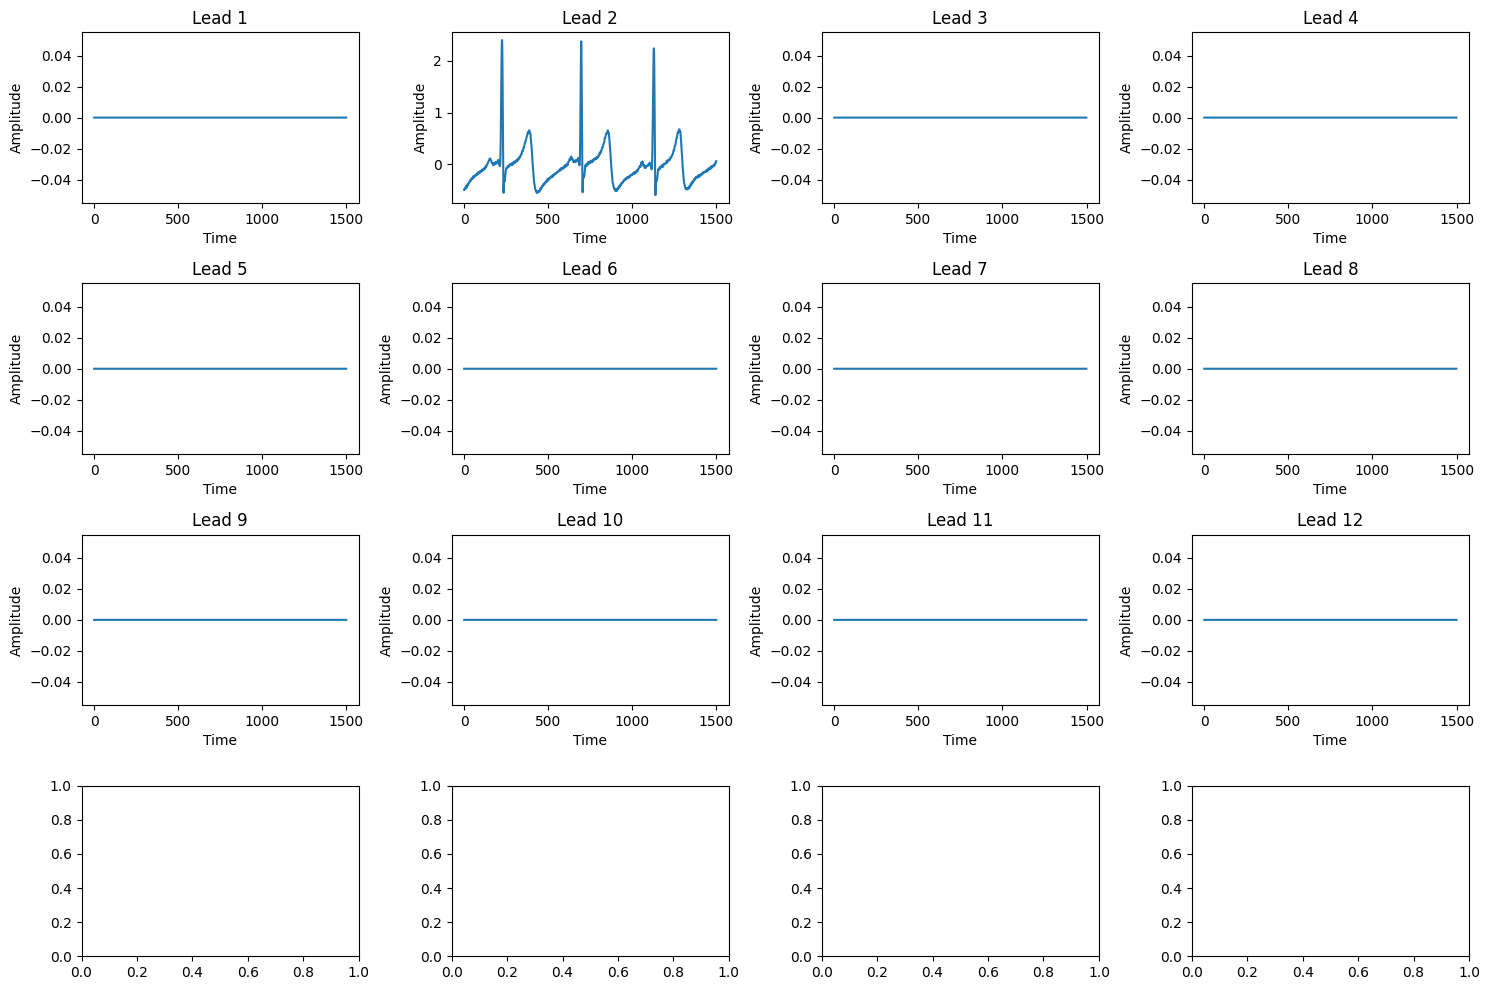

In [101]:
# Set up the figure with 12 subplots, 3 rows and 4 columns
fig, axs = plt.subplots(4, 4, figsize=(15, 10))  # 3 rows and 4 columns for 12 leads

idx = 0
window = X_train[idx].cpu().detach().numpy()
# Plot each lead in a subplot
for i in range(12):
    row, col = divmod(i, 4)  # Determine the row and column in the grid
    axs[row, col].plot(window[i, :1500])  # Plot the i-th lead's data
    axs[row, col].set_title(f'Lead {i+1}')  # Set title for each subplot
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Amplitude')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

tensor([1])


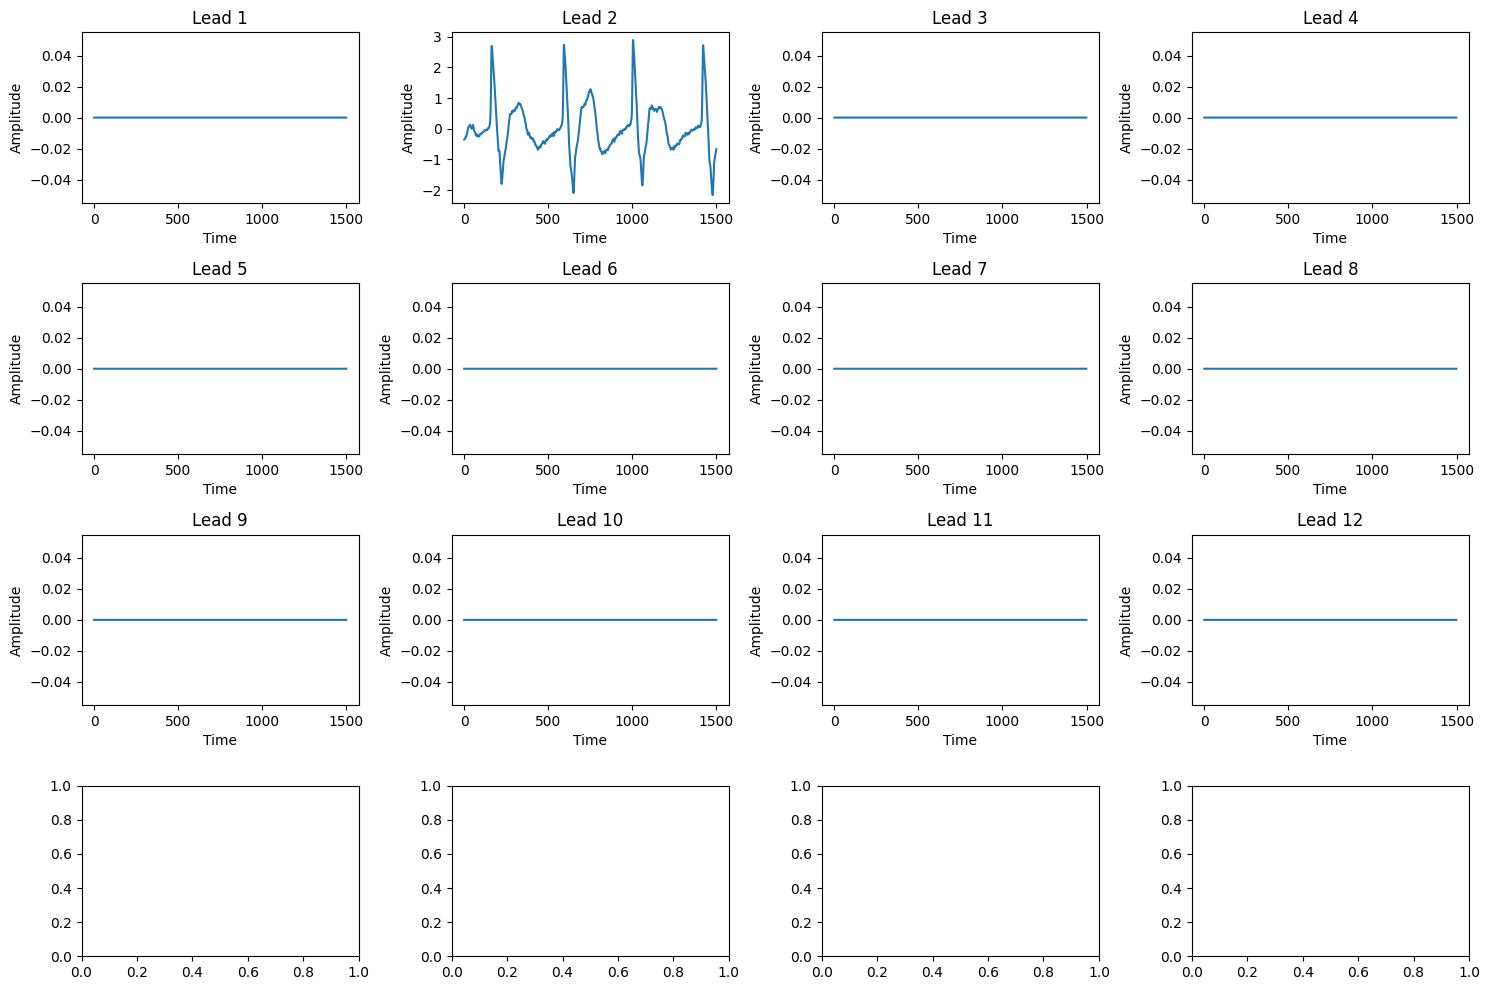

In [102]:
# Set up the figure with 12 subplots, 3 rows and 4 columns
fig, axs = plt.subplots(4, 4, figsize=(15, 10))  # 3 rows and 4 columns for 12 leads

idx = 5000 #50
window = X_test_final[idx].cpu().detach().numpy()
# Plot each lead in a subplot
print(y_test_final[idx])

for i in range(12):
   
    row, col = divmod(i, 4)  # Determine the row and column in the grid
    axs[row, col].plot(window[i, :1500])  # Plot the i-th lead's data
    axs[row, col].set_title(f'Lead {i+1}')  # Set title for each subplot
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Amplitude')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()